In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import ast

In [2]:
#Downloading using nltk packages
nltk.download('punkt')
nltk.download('words')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\divit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\divit\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\divit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
#Reading the data file
df = pd.read_csv(r'D:/Sentiment Analysis/reviews.csv')

In [4]:
#Converting datatype to string
df['content']=df['content'].astype(str)

**#Lower Case**

In [5]:
df['content']=df['content'].apply(lambda x:" ".join(x.lower() for x in x.split()))

**#Remove Links**

In [6]:
import re
url_pattern = re.compile(r'https?://\S+|www\.\S+')

In [7]:
def remove_urls(text):
    return url_pattern.sub(r'',text)

In [8]:
df['content']=df['content'].apply(remove_urls)

**#Remove Next Lines**

In [9]:
df['content']=df['content'].replace('\n',' ',regex=True)

**#Words Containing Numbers**

In [10]:
def remove_num(text):
    return re.sub('\S*\d\S*','',text).strip()

In [11]:
df['content']=df['content'].apply(remove_num)

**#Extra Spaces**

In [12]:
def extra_spaces(text):
    return re.sub(' +',' ',text)

In [13]:
df['content']=df['content'].apply(extra_spaces)

**#Special Characters**

In [14]:
df['content']=df['content'].replace(r'[^A-Za-z0-9]+',' ',regex=True)

**#Removal of Stop Words**

In [15]:
stop_words = set(stopwords.words('english'))
def remove_stop(x):
    return ' '.join([word for word in str(x).split() if word not in stop_words])

In [16]:
df['content']=df['content'].apply(lambda x: remove_stop(x))

**#Stemming**

In [17]:
from nltk.stem.porter import PorterStemmer

In [18]:
stemmer=PorterStemmer()
def stem_words(text):
    word_tokens=text.split()
    stems=' '.join([stemmer.stem(word) for word in word_tokens])
    return stems

In [19]:
df['content']=df['content'].apply(stem_words)

**#Lemmatization**

In [20]:
from nltk.stem import WordNetLemmatizer

In [21]:
lemmatizer=WordNetLemmatizer()
def lemmatize_word(text):
    word_tokens=text.split()
    lemmas=' '.join([lemmatizer.lemmatize(word,pos='v') for word in word_tokens]) #v for verb
    return lemmas

In [22]:
df['content']=df['content'].apply(lemmatize_word)

In [23]:
df.head(10)

,reviewId,userName,userImage,content,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId
0,0197c118-5c6f-4a7b-894c-970023d1a350,Mar Zur,https://play-lh.googleusercontent.com/a/ACg8oc...,recur task everi day need list remind buzz tim...,11,4.16.6.2,22-07-2020 13:13,Our team will be happy to look into it for you...,23-07-2020 16:32,4.16.6.2,most_relevant,com.anydo
1,94868fb5-a21d-4ef9-ab85-81b2ed3d0785,Devin Rivera,https://play-lh.googleusercontent.com/a-/ALV-U...,instead shop around download wide use set one ...,8,NaN,08-12-2020 06:24,We are not aware of any issues with randomized...,10-12-2020 09:38,NaN,most_relevant,com.anydo
2,825da34e-f65d-4ef3-991d-02d5291820d6,Heidi Kinsley,https://play-lh.googleusercontent.com/a/ACg8oc...,everi blue app ask updat acct email everyth ta...,6,5.11.1.2,09-07-2021 13:51,Sorry to hear that! It sounds like you might h...,11-07-2021 11:16,5.11.1.2,most_relevant,com.anydo
3,a49c2875-651a-4c33-b79c-5813780d659e,Daniel Keller,https://play-lh.googleusercontent.com/a/ACg8oc...,terribl updat app use perfect plan certain tas...,5,NaN,16-11-2020 01:50,Please note that the tasks in your tasks view ...,17-11-2020 09:31,NaN,most_relevant,com.anydo
4,9482c75e-2e63-46ab-8c94-47273dd6a829,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,app deceivingli terribl realli nice design fea...,20,4.14.0.4,31-01-2019 16:19,"Hi Ryan, it sounds like you are describing our...",05-02-2019 11:52,4.14.0.4,most_relevant,com.anydo
5,6446c87d-e045-4325-b154-042cde863d74,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,smart groceri list hell might handi sort list ...,19,4.12.0.5,17-01-2019 00:09,Please note that you can turn off the smart li...,30-01-2019 15:18,4.12.0.5,most_relevant,com.anydo
6,afe06e54-1014-49fa-80a6-f2b74880ef7c,rainrunner13,https://play-lh.googleusercontent.com/a-/ALV-U...,wunderlist everyth need issu app replac tri ke...,6,NaN,30-04-2020 06:46,"Any.do is a task management app, which has no ...",03-05-2020 10:27,NaN,most_relevant,com.anydo
7,8256ea78-31ef-4eb4-abb0-1411d11a7d9e,Syd Stoll,https://play-lh.googleusercontent.com/a/ACg8oc...,app almost year realli enjoy mostli use grocer...,84,5.15.2.1,07-11-2021 15:58,This could happen if a user pressed on an adve...,08-11-2021 14:36,5.15.2.1,most_relevant,com.anydo
8,775c3273-36cc-4787-a126-06ec46834507,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,almost perfect develop choos ignor one import ...,3,NaN,07-07-2019 15:10,Popups have been proven to increase productivi...,09-07-2019 11:09,NaN,most_relevant,com.anydo
9,9f47e332-2c56-426c-8430-ce8ffde55706,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,annoy keep sign delet list ive work master sho...,29,4.15.8.11,29-09-2019 16:03,"Hi, that's odd, please send us a bug report in...",02-10-2019 19:51,4.15.8.11,most_relevant,com.anydo


**Exploratory Data Analysis:**

**Word Cloud** is a data visualization technique used for representing text data in which each size word indicates its frequency or importance.

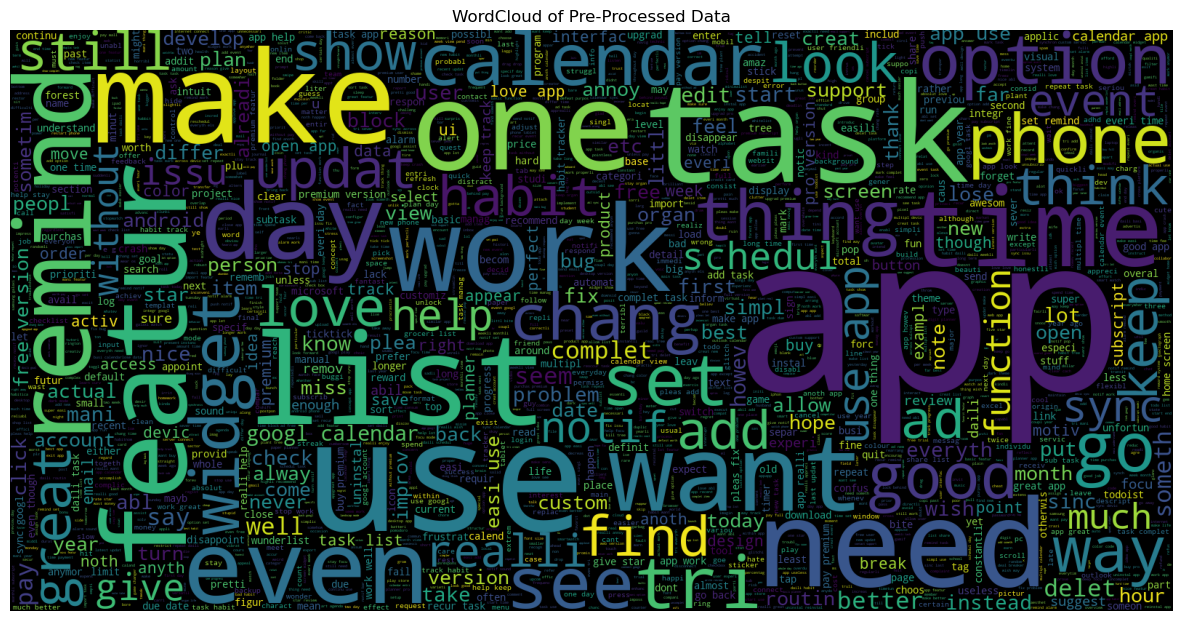

In [24]:
#importing all necessary modules
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#Generating WordCloud
wordcloud = WordCloud(background_color="black", max_words=2000, max_font_size=300, width=1600, height=800)
wordcloud.generate(''.join(df['content'].str.lower()))

#Plotting the WordCloud
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("WordCloud of Pre-Processed Data")
plt.show()

**VADER Sentiment Analysis:**

**VADER (Valence Aware Dictionary sEntiment Reasoner)** is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. **VADER** not only tells about the positivity and negativity score but also tells us about how positive or negative the sentiment is.

In [25]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [26]:
#defining fuction to get sentiment scores using VADER
def sentiment_scores(sentence):
    sia_obj = SentimentIntensityAnalyzer()
    sentiment_dict =sia_obj.polarity_scores(sentence)
    return sentiment_dict

In [27]:
#Storing the sentiment scores in  a seperate column
df['sentiment score']=df['content'].apply(sentiment_scores)

#Storing each sentiment score in a different table
df['vader compound']=df['sentiment score'].apply(lambda text:text['compound'])
df['vader positive']=df['sentiment score'].apply(lambda text:text['pos'])
df['vader negative']=df['sentiment score'].apply(lambda text:text['neg'])
df['vader neutral']=df['sentiment score'].apply(lambda text:text['neu'])

In [28]:
#Categorize the sentiment value as positive, negative or neutral
def categorize_sentiment(sentiment, neg_threshold=-0.05, pos_threshold=0.05):
    if sentiment< neg_threshold:
        label = 'negative'
    elif sentiment> pos_threshold:
        label = 'positive'
    else:
        label = 'neutral'
    return label

df['vader sentiment']=df['vader compound'].apply(categorize_sentiment)
df.head(10)

,reviewId,userName,userImage,content,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId,sentiment score,vader compound,vader positive,vader negative,vader neutral,vader sentiment
0,0197c118-5c6f-4a7b-894c-970023d1a350,Mar Zur,https://play-lh.googleusercontent.com/a/ACg8oc...,recur task everi day need list remind buzz tim...,11,4.16.6.2,22-07-2020 13:13,Our team will be happy to look into it for you...,23-07-2020 16:32,4.16.6.2,most_relevant,com.anydo,"{'neg': 0.213, 'neu': 0.729, 'pos': 0.059, 'co...",-0.7650,0.059,0.213,0.729,negative
1,94868fb5-a21d-4ef9-ab85-81b2ed3d0785,Devin Rivera,https://play-lh.googleusercontent.com/a-/ALV-U...,instead shop around download wide use set one ...,8,NaN,08-12-2020 06:24,We are not aware of any issues with randomized...,10-12-2020 09:38,NaN,most_relevant,com.anydo,"{'neg': 0.053, 'neu': 0.885, 'pos': 0.062, 'co...",0.1027,0.062,0.053,0.885,positive
2,825da34e-f65d-4ef3-991d-02d5291820d6,Heidi Kinsley,https://play-lh.googleusercontent.com/a/ACg8oc...,everi blue app ask updat acct email everyth ta...,6,5.11.1.2,09-07-2021 13:51,Sorry to hear that! It sounds like you might h...,11-07-2021 11:16,5.11.1.2,most_relevant,com.anydo,"{'neg': 0.158, 'neu': 0.801, 'pos': 0.041, 'co...",-0.7184,0.041,0.158,0.801,negative
3,a49c2875-651a-4c33-b79c-5813780d659e,Daniel Keller,https://play-lh.googleusercontent.com/a/ACg8oc...,terribl updat app use perfect plan certain tas...,5,NaN,16-11-2020 01:50,Please note that the tasks in your tasks view ...,17-11-2020 09:31,NaN,most_relevant,com.anydo,"{'neg': 0.0, 'neu': 0.831, 'pos': 0.169, 'comp...",0.7269,0.169,0.000,0.831,positive
4,9482c75e-2e63-46ab-8c94-47273dd6a829,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,app deceivingli terribl realli nice design fea...,20,4.14.0.4,31-01-2019 16:19,"Hi Ryan, it sounds like you are describing our...",05-02-2019 11:52,4.14.0.4,most_relevant,com.anydo,"{'neg': 0.155, 'neu': 0.622, 'pos': 0.223, 'co...",0.4019,0.223,0.155,0.622,positive
5,6446c87d-e045-4325-b154-042cde863d74,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,smart groceri list hell might handi sort list ...,19,4.12.0.5,17-01-2019 00:09,Please note that you can turn off the smart li...,30-01-2019 15:18,4.12.0.5,most_relevant,com.anydo,"{'neg': 0.135, 'neu': 0.686, 'pos': 0.179, 'co...",0.0258,0.179,0.135,0.686,neutral
6,afe06e54-1014-49fa-80a6-f2b74880ef7c,rainrunner13,https://play-lh.googleusercontent.com/a-/ALV-U...,wunderlist everyth need issu app replac tri ke...,6,NaN,30-04-2020 06:46,"Any.do is a task management app, which has no ...",03-05-2020 10:27,NaN,most_relevant,com.anydo,"{'neg': 0.055, 'neu': 0.717, 'pos': 0.227, 'co...",0.7506,0.227,0.055,0.717,positive
7,8256ea78-31ef-4eb4-abb0-1411d11a7d9e,Syd Stoll,https://play-lh.googleusercontent.com/a/ACg8oc...,app almost year realli enjoy mostli use grocer...,84,5.15.2.1,07-11-2021 15:58,This could happen if a user pressed on an adve...,08-11-2021 14:36,5.15.2.1,most_relevant,com.anydo,"{'neg': 0.059, 'neu': 0.876, 'pos': 0.064, 'co...",0.0609,0.064,0.059,0.876,positive
8,775c3273-36cc-4787-a126-06ec46834507,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,almost perfect develop choos ignor one import ...,3,NaN,07-07-2019 15:10,Popups have been proven to increase productivi...,09-07-2019 11:09,NaN,most_relevant,com.anydo,"{'neg': 0.175, 'neu': 0.743, 'pos': 0.082, 'co...",-0.4391,0.082,0.175,0.743,negative
9,9f47e332-2c56-426c-8430-ce8ffde55706,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,annoy keep sign delet list ive work master sho...,29,4.15.8.11,29-09-2019 16:03,"Hi, that's odd, please send us a bug report in...",02-10-2019 19:51,4.15.8.11,most_relevant,com.anydo,"{'neg': 0.067, 'neu': 0.837, 'pos': 0.095, 'co...",0.2960,0.095,0.067,0.837,positive


In [29]:
vader_sentiment_count=df['vader sentiment'].value_counts()
print(vader_sentiment_count)

vader sentiment
positive    11449
negative     2776
neutral      2562
Name: count, dtype: int64


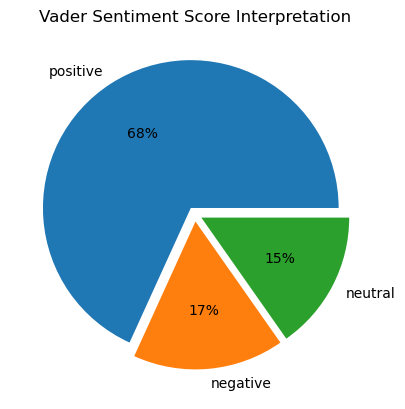

In [30]:
#Plotting a pie chart for the Vader Sentiment Score
explode=(0.05,0.05,0.05)
plt.pie(vader_sentiment_count, labels=vader_sentiment_count.index, autopct='%1.0f%%', explode=explode)
plt.title("Vader Sentiment Score Interpretation")
plt.show()

**Afinn Sentiment Analysis:**

**Afinn** is the simplest and popular lexicon used for sentiment analysis. It contains 3300+ words with a polarity score associated with each word.

In [31]:
#importing the necessary libraries
from afinn import Afinn
afn = Afinn()

#compute sentiment scores (polarity)
def sentiment_scores(x):
    return afn.score(x)
df['afinn sentiment score']=df['content'].apply(sentiment_scores)
#Categorize the sentiment value as positive, negative or neutral
def categorize_sentiment(score):
    if score<0:
        label = 'negative'
    elif score>0:
        label = 'positive'
    else:
        label = 'neutral'
    return label
df['afinn sentiment']=df['afinn sentiment score'].apply(categorize_sentiment)
df.head(10)

,reviewId,userName,userImage,content,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId,sentiment score,vader compound,vader positive,vader negative,vader neutral,vader sentiment,afinn sentiment score,afinn sentiment
0,0197c118-5c6f-4a7b-894c-970023d1a350,Mar Zur,https://play-lh.googleusercontent.com/a/ACg8oc...,recur task everi day need list remind buzz tim...,11,4.16.6.2,22-07-2020 13:13,Our team will be happy to look into it for you...,23-07-2020 16:32,4.16.6.2,most_relevant,com.anydo,"{'neg': 0.213, 'neu': 0.729, 'pos': 0.059, 'co...",-0.7650,0.059,0.213,0.729,negative,-4.0,negative
1,94868fb5-a21d-4ef9-ab85-81b2ed3d0785,Devin Rivera,https://play-lh.googleusercontent.com/a-/ALV-U...,instead shop around download wide use set one ...,8,NaN,08-12-2020 06:24,We are not aware of any issues with randomized...,10-12-2020 09:38,NaN,most_relevant,com.anydo,"{'neg': 0.053, 'neu': 0.885, 'pos': 0.062, 'co...",0.1027,0.062,0.053,0.885,positive,2.0,positive
2,825da34e-f65d-4ef3-991d-02d5291820d6,Heidi Kinsley,https://play-lh.googleusercontent.com/a/ACg8oc...,everi blue app ask updat acct email everyth ta...,6,5.11.1.2,09-07-2021 13:51,Sorry to hear that! It sounds like you might h...,11-07-2021 11:16,5.11.1.2,most_relevant,com.anydo,"{'neg': 0.158, 'neu': 0.801, 'pos': 0.041, 'co...",-0.7184,0.041,0.158,0.801,negative,-2.0,negative
3,a49c2875-651a-4c33-b79c-5813780d659e,Daniel Keller,https://play-lh.googleusercontent.com/a/ACg8oc...,terribl updat app use perfect plan certain tas...,5,NaN,16-11-2020 01:50,Please note that the tasks in your tasks view ...,17-11-2020 09:31,NaN,most_relevant,com.anydo,"{'neg': 0.0, 'neu': 0.831, 'pos': 0.169, 'comp...",0.7269,0.169,0.000,0.831,positive,5.0,positive
4,9482c75e-2e63-46ab-8c94-47273dd6a829,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,app deceivingli terribl realli nice design fea...,20,4.14.0.4,31-01-2019 16:19,"Hi Ryan, it sounds like you are describing our...",05-02-2019 11:52,4.14.0.4,most_relevant,com.anydo,"{'neg': 0.155, 'neu': 0.622, 'pos': 0.223, 'co...",0.4019,0.223,0.155,0.622,positive,3.0,positive
5,6446c87d-e045-4325-b154-042cde863d74,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,smart groceri list hell might handi sort list ...,19,4.12.0.5,17-01-2019 00:09,Please note that you can turn off the smart li...,30-01-2019 15:18,4.12.0.5,most_relevant,com.anydo,"{'neg': 0.135, 'neu': 0.686, 'pos': 0.179, 'co...",0.0258,0.179,0.135,0.686,neutral,-1.0,negative
6,afe06e54-1014-49fa-80a6-f2b74880ef7c,rainrunner13,https://play-lh.googleusercontent.com/a-/ALV-U...,wunderlist everyth need issu app replac tri ke...,6,NaN,30-04-2020 06:46,"Any.do is a task management app, which has no ...",03-05-2020 10:27,NaN,most_relevant,com.anydo,"{'neg': 0.055, 'neu': 0.717, 'pos': 0.227, 'co...",0.7506,0.227,0.055,0.717,positive,5.0,positive
7,8256ea78-31ef-4eb4-abb0-1411d11a7d9e,Syd Stoll,https://play-lh.googleusercontent.com/a/ACg8oc...,app almost year realli enjoy mostli use grocer...,84,5.15.2.1,07-11-2021 15:58,This could happen if a user pressed on an adve...,08-11-2021 14:36,5.15.2.1,most_relevant,com.anydo,"{'neg': 0.059, 'neu': 0.876, 'pos': 0.064, 'co...",0.0609,0.064,0.059,0.876,positive,0.0,neutral
8,775c3273-36cc-4787-a126-06ec46834507,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,almost perfect develop choos ignor one import ...,3,NaN,07-07-2019 15:10,Popups have been proven to increase productivi...,09-07-2019 11:09,NaN,most_relevant,com.anydo,"{'neg': 0.175, 'neu': 0.743, 'pos': 0.082, 'co...",-0.4391,0.082,0.175,0.743,negative,-2.0,negative
9,9f47e332-2c56-426c-8430-ce8ffde55706,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,annoy keep sign delet list ive work master sho...,29,4.15.8.11,29-09-2019 16:03,"Hi, that's odd, please send us a bug report in...",02-10-2019 19:51,4.15.8.11,most_relevant,com.anydo,"{'neg': 0.067, 'neu': 0.837, 'pos': 0.095, 'co...",0.2960,0.095,0.067,0.837,po

In [32]:
afinn_sentiment_count=df['afinn sentiment'].value_counts()
print(afinn_sentiment_count)

afinn sentiment
positive    10744
neutral      3317
negative     2726
Name: count, dtype: int64


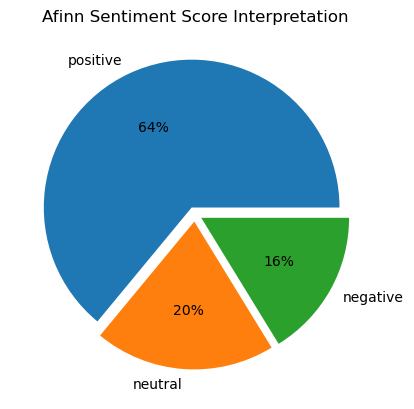

In [33]:
#Plotting a pie chart for the Afinn Sentiment Score
explode=(0.05,0.05,0.05)
plt.pie(afinn_sentiment_count, labels=afinn_sentiment_count.index, autopct='%1.0f%%', explode=explode)
plt.title("Afinn Sentiment Score Interpretation")
plt.show()

**TextBlob Sentiment Analysis:**

**TextBlob** is a python library for processing textual data. TextBlob is buit upon NLTK architecture and returns two properties, namely:

a. Polarity
b. Subjectivity

In [34]:
from textblob import TextBlob

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score ==0:
        return 'Neutral'
    else:
        return 'Positive'

#Store the subjectivity and polarity in the two columns
df['TextBlob_Subjectivity']= df['content'].apply(getSubjectivity)
df['TextBlob_Polarity']= df['content'].apply(getPolarity)
df['TextBlob_Sentiment']= df['TextBlob_Polarity'].apply(getAnalysis)

df.head(10)

,reviewId,userName,userImage,content,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,...,vader compound,vader positive,vader negative,vader neutral,vader sentiment,afinn sentiment score,afinn sentiment,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Sentiment
0,0197c118-5c6f-4a7b-894c-970023d1a350,Mar Zur,https://play-lh.googleusercontent.com/a/ACg8oc...,recur task everi day need list remind buzz tim...,11,4.16.6.2,22-07-2020 13:13,Our team will be happy to look into it for you...,23-07-2020 16:32,4.16.6.2,...,-0.7650,0.059,0.213,0.729,negative,-4.0,negative,0.266667,0.000000,Neutral
1,94868fb5-a21d-4ef9-ab85-81b2ed3d0785,Devin Rivera,https://play-lh.googleusercontent.com/a-/ALV-U...,instead shop around download wide use set one ...,8,NaN,08-12-2020 06:24,We are not aware of any issues with randomized...,10-12-2020 09:38,NaN,...,0.1027,0.062,0.053,0.885,positive,2.0,positive,0.380000,-0.120000,Negative
2,825da34e-f65d-4ef3-991d-02d5291820d6,Heidi Kinsley,https://play-lh.googleusercontent.com/a/ACg8oc...,everi blue app ask updat acct email everyth ta...,6,5.11.1.2,09-07-2021 13:51,Sorry to hear that! It sounds like you might h...,11-07-2021 11:16,5.11.1.2,...,-0.7184,0.041,0.158,0.801,negative,-2.0,negative,0.124242,0.027273,Positive
3,a49c2875-651a-4c33-b79c-5813780d659e,Daniel Keller,https://play-lh.googleusercontent.com/a/ACg8oc...,terribl updat app use perfect plan certain tas...,5,NaN,16-11-2020 01:50,Please note that the tasks in your tasks view ...,17-11-2020 09:31,NaN,...,0.7269,0.169,0.000,0.831,positive,5.0,positive,0.785714,0.607143,Positive
4,9482c75e-2e63-46ab-8c94-47273dd6a829,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,app deceivingli terribl realli nice design fea...,20,4.14.0.4,31-01-2019 16:19,"Hi Ryan, it sounds like you are describing our...",05-02-2019 11:52,4.14.0.4,...,0.4019,0.223,0.155,0.622,positive,3.0,positive,0.666667,0.400000,Positive
5,6446c87d-e045-4325-b154-042cde863d74,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,smart groceri list hell might handi sort list ...,19,4.12.0.5,17-01-2019 00:09,Please note that you can turn off the smart li...,30-01-2019 15:18,4.12.0.5,...,0.0258,0.179,0.135,0.686,neutral,-1.0,negative,0.237897,0.038095,Positive
6,afe06e54-1014-49fa-80a6-f2b74880ef7c,rainrunner13,https://play-lh.googleusercontent.com/a-/ALV-U...,wunderlist everyth need issu app replac tri ke...,6,NaN,30-04-2020 06:46,"Any.do is a task management app, which has no ...",03-05-2020 10:27,NaN,...,0.7506,0.227,0.055,0.717,positive,5.0,positive,0.451515,0.178788,Positive
7,8256ea78-31ef-4eb4-abb0-1411d11a7d9e,Syd Stoll,https://play-lh.googleusercontent.com/a/ACg8oc...,app almost year realli enjoy mostli use grocer...,84,5.15.2.1,07-11-2021 15:58,This could happen if a user pressed on an adve...,08-11-2021 14:36,5.15.2.1,...,0.0609,0.064,0.059,0.876,positive,0.0,neutral,0.500000,0.400000,Positive
8,775c3273-36cc-4787-a126-06ec46834507,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,almost perfect develop choos ignor one import ...,3,NaN,07-07-2019 15:10,Popups have been proven to increase productivi...,09-07-2019 11:09,NaN,...,-0.4391,0.082,0.175,0.743,negative,-2.0,negative,0.650000,0.290000,Positive
9,9f47e332-2c56-426c-8430-ce8ffde55706,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,annoy keep sign delet list ive work master sho...,29,4.15.8.11,29-09-2019 16:03,"Hi, that's odd, please send us a bug report in...",02-10-2019 19:51,4.15.8.11,...,0.2960,0.095,0.067,0.837,positive,1.0,positive,0.304487,0.133333,Positive


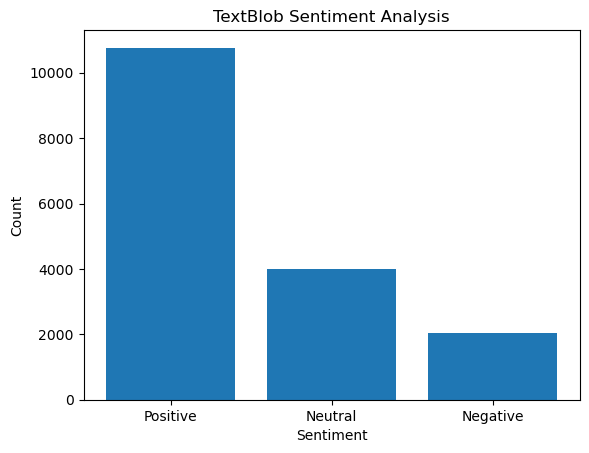

In [35]:
#Count the occurence of each sentiment
textblob_sentiment=df['TextBlob_Sentiment'].value_counts()

#Plot the sentiments
import matplotlib.pyplot as plt
plt.bar(textblob_sentiment.index,textblob_sentiment.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('TextBlob Sentiment Analysis')
plt.show()